<a href="https://colab.research.google.com/github/michelmudemfu/ECE_264/blob/master/Copy_of_Project_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import backend as K
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
import numpy as np
import pickle
import sys
import os


In [2]:
# Load the Data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Loot at the variable type of the variables
print(type(x_train))
# Get the shape of the arrays
print('X-train :', x_train.shape) # 3D contains 32x 32 and = RGB
print('Y-train :', y_train.shape) # 2D
print('X-test  :', x_test.shape) # 3D
print('y-test  :', y_test.shape)  # 2D

<class 'numpy.ndarray'>
X-train : (50000, 32, 32, 3)
Y-train : (50000, 1)
X-test  : (10000, 32, 32, 3)
y-test  : (10000, 1)


In [ ]:
# Visualize images by index position
#index = 10
#for index in range(10):
#print(f'Image class is : \n\n', x_train[index])
  #imag = plt.imshow(x_train[index])

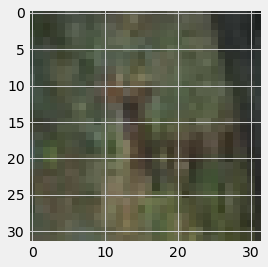

In [ ]:
# Take a look in each images by index

#for index in range(10):
imag = plt.imshow(x_train[index])

In [ ]:
#print the image class
print("image label: ", y_train[index])
#for i in range(10):


image label:  [4]


In [ ]:
# Get image Classification the 10 classes
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("The image class are: ", classification[y_train[index][0]])

The image class are:  deer


In [ ]:
# Convert te labels into a set of 10 numbers to inpout into the neural net
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# print the new labels
print(y_train_one_hot) # This will print a set of 10 numbers all the column will contain a value 0 except 
                        # to one column that will contain value 1 which will be coresponding to that label

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# create the model architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2))) # create 2x2 layer pixel filter to get the max number
#Add another convolution layer
model.add(Conv2D(32, (5,5), activation = 'relu'))
#Add another layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

# Add a drop out layer
model.add(Dropout(0.5)) # drp out with 50% rate

# Add a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

# Add a drop out layer
model.add(Dropout(0.5)) # drp out with 50% rate

# Add a layer with 250 neurons
model.add(Dense(250, activation = 'relu'))
# Add a layer with 10 neurons
model.add(Dense(10, activation = 'softmax'))



In [ ]:
# Compile the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# train the model
hist = model. fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 356ms/step - loss: 1.7782 - accuracy: 0.3324 - val_loss: 1.4363 - val_accuracy: 0.4813
Epoch 2/10
157/157 [==============================] - 55s 352ms/step - loss: 1.4218 - accuracy: 0.4780 - val_loss: 1.3104 - val_accuracy: 0.5252
Epoch 3/10
157/157 [==============================] - 56s 355ms/step - loss: 1.2849 - accuracy: 0.5359 - val_loss: 1.2351 - val_accuracy: 0.5597
Epoch 4/10
157/157 [==============================] - 57s 365ms/step - loss: 1.1933 - accuracy: 0.5731 - val_loss: 1.1154 - val_accuracy: 0.6078
Epoch 5/10
157/157 [==============================] - 56s 358ms/step - loss: 1.0932 - accuracy: 0.6140 - val_loss: 1.1196 - val_accuracy: 0.6014
Epoch 6/10
157/157 [==============================] - 56s 355ms/step - loss: 1.0220 - accuracy: 0.6384 - val_loss: 1.1985 - val_accuracy: 0.5923
Epoch 7/10
157/157 [==============================] - 60s 379ms/step - loss: 0.9712 - accuracy: 0.6583 - val_loss: 1.0164 - val_ac

In [ ]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1] # Test image in position 1

313/313 [==============================] - 5s 16ms/step - loss: 0.9292 - accuracy: 0.6762


0.6761999726295471

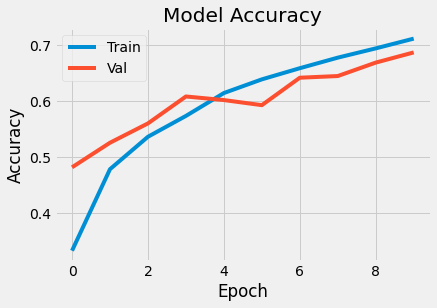

In [ ]:
# Visualize the model accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

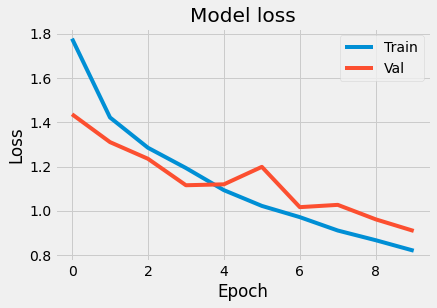

In [ ]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()


In [ ]:
# test the model with an example
from google.colab import files
uploaded = files.upload()

Saving fxslide2.jpg to fxslide2.jpg


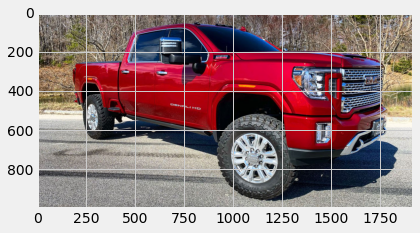

In [ ]:
# show the image
new_image = plt.imread('fxslide2.jpg')
imh = plt.imshow(new_image)

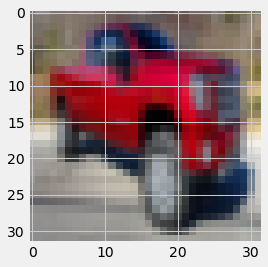

In [ ]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))
# Show the predictions
predictions

array([[5.7096817e-03, 4.8599219e-01, 3.7104084e-05, 3.5504472e-05,
        5.8907939e-05, 2.4386840e-05, 7.7027937e-05, 3.1897838e-05,
        1.8328677e-03, 5.0620037e-01]], dtype=float32)

In [ ]:
# Sort the predictions from leat to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
      
# Show the sorted labels in order 
print(list_index)


[9, 1, 0, 8, 6, 4, 2, 3, 7, 5]


In [ ]:
# print the first 5 predictions 
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')


truck : 50.62 %
automobile : 48.6 %
airplane : 0.57 %
ship : 0.18 %
frog : 0.01 %
